<a href="https://colab.research.google.com/github/subramaniannk/Eigenfaces-leaders/blob/main/Final_PCA_Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=60,resize=0.4)

X = lfw_people.data

y = lfw_people.target

target_names = [lfw_people.target_names[a] for a in y]

n_samples, h, w = lfw_people.images.shape

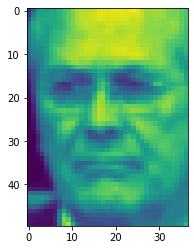

In [5]:
Blair_images=lfw_people.images[11].flatten()
from matplotlib import pyplot as plt
#plt.imshow(Blair_images)
plt.imshow(Blair_images.reshape(50,37))

In [7]:
import numpy as np
Blair_images=lfw_people.images[8].flatten()
Blair_labels=np.array([1,0,0,0])
Powell_images=lfw_people.images[0].flatten()
Powell_labels=np.array([0,0,1,0])
Bush_images=lfw_people.images[1].flatten()
Bush_labels=np.array([0,1,0,0])
Chavez_images=lfw_people.images[4].flatten()
Koizumi_images=lfw_people.images[6].flatten()
Sharon_images=lfw_people.images[9].flatten()
Schroeder_images=lfw_people.images[70].flatten()
Rumsfeld_images=lfw_people.images[11].flatten()
Rumsfeld_labels=np.array([0,0,0,1])

In [8]:
import numpy as np
for iter in range(12,len(y)):
  temp=np.array(lfw_people.images[iter].flatten())
  if(target_names[iter]=="Colin Powell"):
    Powell_images=np.vstack((Powell_images,[temp]))
    Powell_labels=np.vstack((Powell_labels,[0,0,1,0]))
  if(target_names[iter]=="Donald Rumsfeld"):
    Rumsfeld_images=np.vstack((Rumsfeld_images,[temp]))
    Rumsfeld_labels=np.vstack((Rumsfeld_labels,[0,0,0,1]))
  if(target_names[iter]=="George W Bush"):
    Bush_images=np.vstack((Bush_images,[temp]))
    Bush_labels=np.vstack((Bush_labels,[0,1,0,0]))
  if(target_names[iter]=="Tony Blair"):
    Blair_images=np.vstack((Blair_images,[temp]))
    Blair_labels=np.vstack((Blair_labels,[1,0,0,0]))

In [9]:
train_Blair=Blair_images[0:110]
trainlabels_Blair=Blair_labels[0:110]
test_Blair=Blair_images[90:120]
testlabels_Blair=Blair_labels[90:120]
train_Bush=Bush_images[0:110]
trainlabels_Bush=Bush_labels[0:110]
test_Bush=Bush_images[90:120]
testlabels_Bush=Bush_labels[90:120]
train_Powell=Powell_images[0:110]
trainlabels_Powell=Powell_labels[0:110]
test_Powell=Powell_images[90:120]
testlabels_Powell=Powell_labels[90:120]
train_Rumsfeld=Rumsfeld_images[0:110]
trainlabels_Rumsfeld=Rumsfeld_labels[0:110]
test_Rumsfeld=Rumsfeld_images[90:120]
testlabels_Rumsfeld=Rumsfeld_labels[90:120]

In [10]:
train_images=np.vstack([train_Blair,train_Bush,train_Powell,train_Rumsfeld])



In [11]:
U, S, VT = np.linalg.svd(train_images,full_matrices=False)
S = np.diag(S)

In [12]:
feature_space=VT[:30,:]
features_train=(feature_space@(train_images.T)).T
features_train[0]

array([-6.5009595e+03, -2.3098790e+02,  6.7025665e+02, -3.6748053e+02,
        1.5141577e+02, -3.3841791e+02,  8.1390869e+01, -1.8542021e+02,
        5.4383887e+02, -2.8108459e+01,  6.8208252e+01, -1.7796399e+02,
        1.9677182e+02, -1.3599963e+02,  1.5354019e+01,  2.6623389e+02,
       -1.2232593e+02,  1.3014841e+02, -5.9188011e+01,  2.2246948e+02,
       -2.4460501e+02,  8.0503113e+01, -5.2266068e+01,  2.7134083e+01,
       -4.6811638e+00,  1.5777756e+02, -2.9302742e+01,  1.4213654e+01,
       -5.1215115e+01,  8.0779114e+00], dtype=float32)

In [13]:
Blair_TransformedTrain=(feature_space@(train_Blair.T)).T
Bush_TransformedTrain=(feature_space@(train_Bush.T)).T
Powell_TransformedTrain=(feature_space@(train_Powell.T)).T
Rumsfeld_TransformedTrain=(feature_space@(train_Rumsfeld.T)).T
Blair_TransformedTest=(feature_space@(test_Blair.T)).T
Bush_TransformedTest=(feature_space@(test_Bush.T)).T
Powell_TransformedTest=(feature_space@(test_Powell.T)).T
Rumsfeld_TransformedTest=(feature_space@(test_Rumsfeld.T)).T

In [14]:
Test_images=np.vstack([Blair_TransformedTest,Bush_TransformedTest,Powell_TransformedTest,Rumsfeld_TransformedTest])
Test_labels=np.vstack([testlabels_Blair,testlabels_Bush,testlabels_Powell,testlabels_Rumsfeld])


In [15]:
temp=Bush_TransformedTest[16]

In [17]:
k=3
for temp in range(0,len(Test_images)):
  temp_images=Test_images[temp]
  A=np.sort(np.sum((Blair_TransformedTrain-temp_images)*(Blair_TransformedTrain-temp_images), axis=1))
  Blair_estimate=np.sum(A[:k])/k
  B=np.sort(np.sum((Bush_TransformedTrain-temp_images)*(Bush_TransformedTrain-temp_images), axis=1))
  Bush_estimate=np.sum(B[:k])/k
  C=np.sort(np.sum((Powell_TransformedTrain-temp_images)*(Powell_TransformedTrain-temp_images), axis=1))
  Powell_estimate=np.sum(C[:k])/k
  D=np.sort(np.sum((Rumsfeld_TransformedTrain-temp_images)*(Rumsfeld_TransformedTrain-temp_images), axis=1))
  Rumsfeld_estimate=np.sum(D[:k])/k
  estimates=np.array([Blair_estimate, Bush_estimate, Powell_estimate,Rumsfeld_estimate])
  min_value=min(estimates)
  if(temp==0):
    ans=1*np.array(estimates==min_value)
  else:
    ans=np.vstack((ans,[1*np.array(estimates==min_value)]))


print("accuracy:" +str(np.sum(ans*Test_labels)/len(ans)))
  

accuracy:0.8916666666666667


0.7083333333333334


120